<a name="top"></a>
# Predicting Real/Fake News

## 4-Modelling-and-Evaluation
---
* [Problem Statement](#Problem-Statement)
* [Executive Summary](#Executive-Summary)
    * [Context](#Context)
    * [Scope](#Scope)
* [Data Dictionary](#Data-Dictionary)
    * [News Topics based on Topic Modelling](#News-Topic-based-on-Topic-Modelling)
* [Importing Libraries](#Importing-Libraries)
    * [Loading Corpus](#Loading-Corpus)
* [Text Preprocessing](#Text-Preprocessing)
    * [Stopwords](#Stopwords)
* [Modelling](#Modelling)
    * [Title](#Title)
        * [Logistic Regression](#Logistic-Regression)
    * [Title >=5 words](#Title->=5-words)
        * [Logistic Regression](#Logistic-Regression)
    * [Text](#Text)
        * [Logistic Regression](#Logistic-Regression)
        * [Multinomial Naive Bayes](#Multinomial-Naive-Bayes)
        * [Decision Trees](#Decision-Tress)
    * [Title and Text](#Title-and-Text)
        * [Decision Trees](#Decision-Trees)
* [Conclusion and Recommendation](#Conclusion-and-Recommendation)


## Problem Statement

**To predict real/fake news** based on a kaggle dataset containing various news sources within the US.

## Executive Summary

### Context

Fake news has risen dramatically in popular consciousness over the last few years. According to a Pew Research Center study, Americans deem fake news to be a larger problem than racism, climate change or terrorism. With the advent of social media and the amount of information accessible to us, it is getting increasingly difficult to distinguish between real news and fake news. Therefore, this could have severe repercussions within society if the problem is not dealt with. 

### Scope

The goal of this project was to come up with a model that distinguishes real and fake news using a kaggle data set that contains real news and fake news based on US news outlets. In order to tackle the problem of fake news, several classification models such as the Logistic Regression and Decision trees were applied. It is worth pointing out that the data set is limited in terms of its time frame where news was collated between 2015 and 2018 and also only based on US news outlets. However, the model that has been trained can certainly be helpful in other countries as well.

## Data Dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|title|object|true/fake kaggle|title of news article| 
|text|object|true/fake kaggle|content of the news|
|category|int|true/fake kaggle|"1" = true, "0" = fake (target variable)|
|title_length|int|true/fake kaggle|number of words in title of news article| 
|text_length|int|true/fake kaggle|number of words in content of news|

### News Topics based on Topic Modelling

1. **Topic 0** - Military/War
2. **Topic 1** - Elections/Presidential Campaigns
3. **Topic 3** - Finance/Governmental Policies
4. **Topic 4** - Media

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from sklearn.feature_extraction import text
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler, Binarizer
from sklearn.feature_selection import SelectPercentile, mutual_info_classif, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokens import Doc
from nltk.corpus import stopwords
nlp = spacy.load('en_core_web_sm')
import pickle

from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokens import Doc
from bs4 import BeautifulSoup
import re,string,unicodedata
from pprint import pprint

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['trump', 'says', 'trumps','day','child','large', 'said', 'president', 'video', 'obama', 'people', 'house','state','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'new', 'still', 'year', 'work', 'continue', 'show', 'love', 'pass', 'socalle', 'passage', 'medium', 'claim', 'tell', 'evidence', 'watch', 'man','thing','become','give','way','call','include','student','time','call','woman','leave','today','look'])


# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
warnings.filterwarnings('ignore')
sns.set_style('ticks')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
pd.set_option('display.max_colwidth', None)

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

### Loading Corpus

In [2]:
df = pd.read_pickle("corpuseda.pkl")
display(df.head())

title  \
0        as us budget fight looms republicans flip their fiscal script   
1        us military to accept transgender recruits on monday pentagon   
2               senior us republican senator let mr mueller do his job   
3            fbi russia probe helped by australian diplomat tipoff nyt   
4  trump wants postal service to charge much more for amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [3]:
df.shape

(39080, 5)

## Text Preprocessing

### Stop Words

In [4]:
# the default NLTK stopword list
stop_words = set(stopwords.words('english'))  

# add additional stopwords
additional_stopwords = (['trump', 'says', 'trumps','day','child','large', 'said', 'president', 'video', 'obama', 'people', 'house','state','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'new', 'still', 'year', 'work', 'continue', 'show', 'love', 'pass', 'socalle', 'passage', 'medium', 'claim', 'tell', 'evidence', 'watch', 'man','thing','become','give','way','call','include','student','time','call','woman','leave','today','look'])
stop_words = stop_words.union(additional_stopwords)

## Modelling

#### Baseline Accuracy

The baseline model would predict class 1 (Real news) about 54% of the time.

In [169]:
df.category.value_counts(normalize=True)

1    0.541965
0    0.458035
Name: category, dtype: float64

### `Title`

#### Train-Test-Split

In [5]:
X = df['title']
y = df[['category']]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(31264,)
(31264, 1)
(7816,)
(7816, 1)


### Logistic Regression

In [7]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
     ])

#Specifies different hyperparameter values that we want to test across
params = {
    'vect__ngram_range':[(1,3)],
    'vect__min_df':[2,5],
    'vect__stop_words':[None,'stop_words'],
}

#Executes GridSearch
gs = GridSearchCV(pipe, params, cv=10)
gs.fit(X_train, y_train)


print('Train accuracy:', gs.score(X_train, y_train))
print('Validation accuracy:', gs.score(X_val, y_val))
print(gs.best_params_)

Train accuracy: 0.964335977482088
Validation accuracy: 0.9411463664278403
{'vect__min_df': 5, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}


In [8]:
prediction = gs.predict(X_val)
print(confusion_matrix(y_val, prediction))
print(classification_report(y_val, prediction))

[[3301  279]
 [ 181 4055]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3580
           1       0.94      0.96      0.95      4236

    accuracy                           0.94      7816
   macro avg       0.94      0.94      0.94      7816
weighted avg       0.94      0.94      0.94      7816



In [9]:
# Generating a confusion matrix.

tn, fp, fn, tp = confusion_matrix(y_val, prediction).ravel()

In [10]:
conf_mat = pd.DataFrame(columns=['Actual True=1', 'Actual Fake=0'], 
                         index=['Predicted True=1', 'Predicted Fake=0'],
                         data=[[f'{tp} (True Pos)', f'{fp} (False Pos)'], [f'{fn} (False Neg)', f'{tn} (True Neg)']]
                        )
conf_mat

,Actual True=1,Actual Fake=0
Predicted True=1,4055 (True Pos),279 (False Pos)
Predicted Fake=0,181 (False Neg),3301 (True Neg)


In [11]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print(sensitivity)
print(specificity)
print(precision)

0.9572710103871577
0.9220670391061453
0.9356252884171666


### `Title >=5 words`

#### Train-Test-Split

In [12]:
df_long = df[df['title_length']>=5]
X = df_long['title']
y = df_long[['category']]

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(31244,)
(31244, 1)
(7811,)
(7811, 1)


### Logistic Regression

In [14]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
     ])

#Specifies different hyperparameter values that we want to test across
params = {
    'vect__ngram_range':[(1,3)],
    'vect__min_df':[2,5],
    'vect__stop_words':[None,'stop_words'],
}

#Executes GridSearch
gs = GridSearchCV(pipe, params, cv=10)
gs.fit(X_train, y_train)


print('Train accuracy:', gs.score(X_train, y_train))
print('Validation accuracy:', gs.score(X_val, y_val))
print(gs.best_params_)

Train accuracy: 0.9651453078991167
Validation accuracy: 0.9411086928690309
{'vect__min_df': 5, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}


In [15]:
prediction = gs.predict(X_val)
print(confusion_matrix(y_val, prediction))
print(classification_report(y_val, prediction))

[[3298  278]
 [ 182 4053]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3576
           1       0.94      0.96      0.95      4235

    accuracy                           0.94      7811
   macro avg       0.94      0.94      0.94      7811
weighted avg       0.94      0.94      0.94      7811



In [16]:
# Generating a confusion matrix.

tn, fp, fn, tp = confusion_matrix(y_val, prediction).ravel()

In [17]:
conf_mat = pd.DataFrame(columns=['Actual True=1', 'Actual Fake=0'], 
                         index=['Predicted True=1', 'Predicted Fake=0'],
                         data=[[f'{tp} (True Pos)', f'{fp} (False Pos)'], [f'{fn} (False Neg)', f'{tn} (True Neg)']]
                        )
conf_mat

,Actual True=1,Actual Fake=0
Predicted True=1,4053 (True Pos),278 (False Pos)
Predicted Fake=0,182 (False Neg),3298 (True Neg)


In [18]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print(sensitivity)
print(specificity)
print(precision)

0.9570247933884297
0.9222595078299777
0.9358115908566151


### `Text`

#### Train-Test-Split

In [19]:
X = df['text']
y = df[['category']]

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(31264,)
(31264, 1)
(7816,)
(7816, 1)


### Logistic Regression

In [21]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
     ])

#Specifies different hyperparameter values that we want to test across
params = {
    'vect__ngram_range':[(1,3)],
    'vect__min_df':[2,5],
    'vect__stop_words':[None,'stop_words'],
}

#Executes GridSearch
gs = GridSearchCV(pipe, params, cv=10)
gs.fit(X_train, y_train)


print('Train accuracy:', gs.score(X_train, y_train))
print('Validation accuracy:', gs.score(X_val, y_val))
print(gs.best_params_)

Train accuracy: 0.9930910951893551
Validation accuracy: 0.9878454452405322
{'vect__min_df': 5, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}


In [22]:
prediction = gs.predict(X_val)
print(confusion_matrix(y_val, prediction))
print(classification_report(y_val, prediction))

[[3512   68]
 [  27 4209]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3580
           1       0.98      0.99      0.99      4236

    accuracy                           0.99      7816
   macro avg       0.99      0.99      0.99      7816
weighted avg       0.99      0.99      0.99      7816



In [23]:
# Generating a confusion matrix.

tn, fp, fn, tp = confusion_matrix(y_val, prediction).ravel()

In [24]:
conf_mat = pd.DataFrame(columns=['Actual True=1', 'Actual Fake=0'], 
                         index=['Predicted True=1', 'Predicted Fake=0'],
                         data=[[f'{tp} (True Pos)', f'{fp} (False Pos)'], [f'{fn} (False Neg)', f'{tn} (True Neg)']]
                        )
conf_mat

,Actual True=1,Actual Fake=0
Predicted True=1,4209 (True Pos),68 (False Pos)
Predicted Fake=0,27 (False Neg),3512 (True Neg)


In [25]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print(sensitivity)
print(specificity)
print(precision)

0.9936260623229461
0.9810055865921787
0.9841010053776011


### Multinomial Naive Bayes

In [31]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
     ])

#Specifies different hyperparameter values that we want to test across
params = {
    'vect__ngram_range':[(1,3)],
    'vect__min_df':[2,5],
    'vect__stop_words':[None,'stop_words'],
}

#Executes GridSearch
gs = GridSearchCV(pipe, params, cv=10)
gs.fit(X_train, y_train)


print('Train accuracy:', gs.score(X_train, y_train))
print('Validation accuracy:', gs.score(X_val, y_val))
print(gs.best_params_)

Train accuracy: 0.9584186284544524
Validation accuracy: 0.9524053224155579
{'vect__min_df': 5, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}


In [32]:
prediction = gs.predict(X_val)
print(confusion_matrix(y_val, prediction))
print(classification_report(y_val, prediction))

[[3282  298]
 [  74 4162]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3580
           1       0.93      0.98      0.96      4236

    accuracy                           0.95      7816
   macro avg       0.96      0.95      0.95      7816
weighted avg       0.95      0.95      0.95      7816



In [33]:
# Generating a confusion matrix.

tn, fp, fn, tp = confusion_matrix(y_val, prediction).ravel()

In [34]:
conf_mat = pd.DataFrame(columns=['Actual True=1', 'Actual Fake=0'], 
                         index=['Predicted True=1', 'Predicted Fake=0'],
                         data=[[f'{tp} (True Pos)', f'{fp} (False Pos)'], [f'{fn} (False Neg)', f'{tn} (True Neg)']]
                        )
conf_mat

,Actual True=1,Actual Fake=0
Predicted True=1,4162 (True Pos),298 (False Pos)
Predicted Fake=0,74 (False Neg),3282 (True Neg)


In [35]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print(sensitivity)
print(specificity)
print(precision)

0.9825306893295562
0.9167597765363128
0.9331838565022421


### Decision Trees

In [42]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', DecisionTreeClassifier(criterion= 'entropy',
                                     max_depth = 10, 
                                     splitter='best', 
                                     random_state=2020))])

#Specifies different hyperparameter values that we want to test across
params = {
    'vect__ngram_range':[(1,3)],
    'vect__min_df':[2,5],
    'vect__stop_words':[None,'stop_words'],
}

#Executes GridSearch
gs = GridSearchCV(pipe, params, cv=10)
gs.fit(X_train, y_train)


print('Train accuracy:', gs.score(X_train, y_train))
print('Validation accuracy:', gs.score(X_val, y_val))
print(gs.best_params_)

Train accuracy: 0.9992963152507677
Validation accuracy: 0.9961617195496417
{'vect__min_df': 2, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}


In [43]:
train_acc = gs.score(X_train,y_train)
test_acc = gs.score(X_val,y_val)

In [44]:
train_acc

0.9992963152507677

In [45]:
test_acc

0.9961617195496417

In [46]:
prediction = gs.predict(X_val)
prediction_proba = gs.predict_proba(X_val)
print(confusion_matrix(y_val, prediction))
print(classification_report(y_val, prediction,target_names = ['Fake','True'] ))

[[3564   16]
 [  14 4222]]
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      3580
        True       1.00      1.00      1.00      4236

    accuracy                           1.00      7816
   macro avg       1.00      1.00      1.00      7816
weighted avg       1.00      1.00      1.00      7816



In [47]:
# Generating a confusion matrix.

tn, fp, fn, tp = confusion_matrix(y_val, prediction).ravel()

In [48]:
conf_mat = pd.DataFrame(columns=['Actual True=1', 'Actual Fake=0'], 
                         index=['Predicted True=1', 'Predicted Fake=0'],
                         data=[[f'{tp} (True Pos)', f'{fp} (False Pos)'], [f'{fn} (False Neg)', f'{tn} (True Neg)']]
                        )
conf_mat

,Actual True=1,Actual Fake=0
Predicted True=1,4222 (True Pos),16 (False Pos)
Predicted Fake=0,14 (False Neg),3564 (True Neg)


In [49]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print(sensitivity)
print(specificity)
print(precision)

0.9966949952785646
0.9955307262569832
0.996224634261444


The **confusion matrix** gives a lot of information but it would be helpful to get a more concise metric. For instance, one could get the accuracy of the positive predictions. This could be calculated by the **precision**. This metric is usually used alongside **sensitivy/recall (true positive rate)**, which, in essence is the ration of positive instances that are correctly detected by the classifier. Finally it is also common practice to combine both **Precision** and **Recall** into a common metric called the **F1 Score**. It is a harmonic mean of precision and recall. As a result, the classifier will only get a high **F1 Score** if both precision and recall are high.

**Precision**: True positives/(True posistives + False positives)

**Recall/Sensitivity**: True positives/(True Positives + False Negatives)

**F1 Score**: 2/((1/precision) + (1/recall))

#### Sensitivity/Recall

Ratio of positive instances that are correctly detected by the classifier.

#### Specificity

Ratio of negative instances that are correctly detected by the classifier.

#### Precision

Accuracy of the positive predictions. i.e Accuracy of Real News predictions.

In [18]:
import pickle
import os
with open('model.pickle','wb') as handle:
    pickle.dump(gs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
with open('model.pickle','rb') as handle:
    model = pickle.load(handle)

In [20]:
model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('model',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               max_depth=10,
                                                               random_state=2020))]),
             param_grid={'vect__min_df': [2, 5], 'vect__ngram_range': [(1, 3)],
                         'vect__stop_words': [None, 'stop_words']})

### `Title and Text`

#### Train-Test-Split

In [50]:
df['text'] = df['title'] + " " + df['text']
del df['title']
df.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support education scientific research infrastructure public health and environmental protection the trump administration has already been willing to say were going to increase nondefense discretionary spending  by about  percent meadows chairman of the small but influential house freedom caucus said on the program now democrats are saying thats not enough we need to give the government a pay raise of  to  percent for a fiscal conservative i dont see where the rationale is  eventually you run out of other peoples money he said meadows was among republicans who voted in late december for their partys debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about  trillion over  years to the  trillion national debt its interesting to hear mark talk about fiscal responsibility democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the united states to borrow  trillion to be paid off by future generations to finance tax cuts for corporations and the rich this is one of the least  fiscally responsible bills weve ever seen passed in the history of the house of representatives i think were going to be paying for this for many many years to come crowley said republicans insist the tax package the biggest us tax overhaul in more than  years will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or entitlement reform as the party often calls it would be a top republican priority in  in republican parlance entitlement programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryans early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the dreamers people brought illegally to the country as children trump in september put a march  expiration date o

In [51]:
X = df['text']
y = df[['category']]

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(31264,)
(31264, 1)
(7816,)
(7816, 1)


### Decision Trees

In [53]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', DecisionTreeClassifier(criterion= 'entropy',
                                     max_depth = 10, 
                                     splitter='best', 
                                     random_state=2020))])

#Specifies different hyperparameter values that we want to test across
params = {
    'vect__ngram_range':[(1,3)],
    'vect__min_df':[2,5],
    'vect__stop_words':[None,'stop_words'],
}

#Executes GridSearch
gs = GridSearchCV(pipe, params, cv=10)
gs.fit(X_train, y_train)


print('Train accuracy:', gs.score(X_train, y_train))
print('Validation accuracy:', gs.score(X_val, y_val))
print(gs.best_params_)

Train accuracy: 0.9992003582395087
Validation accuracy: 0.9962896622313203
{'vect__min_df': 2, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}


In [54]:
prediction = gs.predict(X_val)
print(confusion_matrix(y_val, prediction))
print(classification_report(y_val, prediction))

[[3560   20]
 [   9 4227]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3580
           1       1.00      1.00      1.00      4236

    accuracy                           1.00      7816
   macro avg       1.00      1.00      1.00      7816
weighted avg       1.00      1.00      1.00      7816



In [55]:
# Generating a confusion matrix.

tn, fp, fn, tp = confusion_matrix(y_val, prediction).ravel()

In [56]:
conf_mat = pd.DataFrame(columns=['Actual True=1', 'Actual Fake=0'], 
                         index=['Predicted True=1', 'Predicted Fake=0'],
                         data=[[f'{tp} (True Pos)', f'{fp} (False Pos)'], [f'{fn} (False Neg)', f'{tn} (True Neg)']]
                        )
conf_mat

,Actual True=1,Actual Fake=0
Predicted True=1,4227 (True Pos),20 (False Pos)
Predicted Fake=0,9 (False Neg),3560 (True Neg)


In [57]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print(sensitivity)
print(specificity)
print(precision)

0.9978753541076487
0.994413407821229
0.995290793501295


## Conclusion and Recommendation

Decision Tree model performed the best out of all the models attaining an accuracy of **99.5%**. As baseline model was around **50%** for both classes, this represents a significant improvement. However, having said that, the model is still slightly overfitted. The model that produced the best result is **CountVectorizer and Decision Trees** with **Text** of the news as the explanatory variable. In addition, the confusion matrix indicates that only 19 documents were classified as false positives (wrongly predicting news is true when it is fake) and  17 documents were classified as false negatives (wrongly predicting news is false when it is true). Overall, this model will enable people to better distinguish between the real and fake news. 

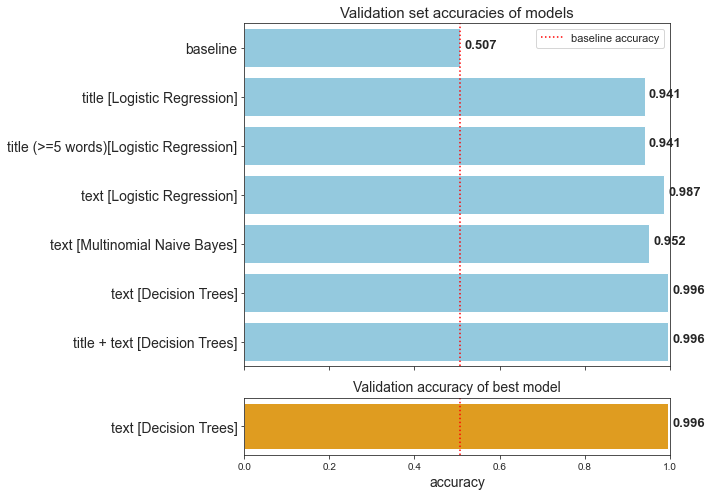

In [59]:
# put accuracy scores of different models into dataframe
model_results = pd.DataFrame([[0.507,0.964,0.965,0.993,0.958, 0.999,0.999],
                              [0.507,0.941,0.941,0.987,0.952, 0.996,0.996]],
                            index = ['train_accuracy','val_accuracy'],
                            columns = ['baseline',
                                       'title [Logistic Regression]',
                                       'title (>=5 words)[Logistic Regression]',
                                       'text [Logistic Regression]',
                                       'text [Multinomial Naive Bayes]',
                                       'text [Decision Trees]',
                                       'title + text [Decision Trees]']).T

# plot results
fig, ax = plt.subplots(nrows = 2, figsize=(10,7), sharex = True, gridspec_kw={'height_ratios': [6, 1]})

sns.barplot(y = model_results.index, x = model_results.val_accuracy, color='skyblue',orient='h', ax = ax[0])
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].set_xlim(0,1)
ax[0].set_title('Validation set accuracies of models', fontsize = 15)
# label with accuracy values
for index, val in enumerate([0.507,0.941,0.941,0.987,0.952, 0.996,0.996]):
    ax[0].text(val+0.01, index, str(val), fontweight='bold', fontsize=13)
ax[0].axvline(x=0.507,linestyle='dotted',color='red',label='baseline accuracy')
ax[0].legend(loc='upper right',facecolor='white',fontsize=11)
ax[0].set_xlabel('')

sns.barplot(x = 0.996, y = ['text [Decision Trees]'], color='orange',orient='h',ax=ax[1])
ax[1].set_title('Validation accuracy of best model', fontsize=14)
ax[1].tick_params(axis='y', labelsize=14)
# label with accuracy value
ax[1].text(0.996+0.01, 0, str(0.996), fontweight='bold', fontsize=13)
ax[1].axvline(x=0.507,linestyle='dotted',color='red',label='baseline accuracy')
ax[1].set_xlabel('accuracy', fontsize = 14)

plt.tight_layout()

The model was then deployed on unseen data but did not perform as well as it did on the validation set. The data set leaned very heavily towards US news and they were from a small sample of news sources such as CNN. Therefore, it makes sense that the model didn't perform well when the BBC or Al Jazeera was used as unseen data. Another factor to consider is that the time period was very short (2015-2018) and typically, news content is dynamic in nature. Suppose if an article covers covid-19 related article today, it is very likely that the model would predict it as fake news. Therefore, one has to be aware of its limitations. However, that being said, this approach could prove to be useful if a much larger corpus of various news outlets and an extended time frame is factored into the equation. 

For future research, one could also explore deep learning techniques such as word2vec which could provide better results. 